In [1]:
#importing libraryies needed as bibliotecas necessarias

 


from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit.visualization import plot_distribution



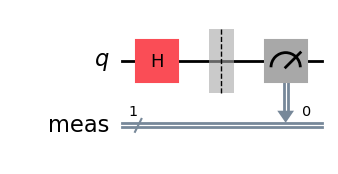

In [2]:
#initializing  quantum circuit



qc = QuantumCircuit(1)   #just 1 qubit
qc.h(0)   #Aplying hadamard

qc.measure_all() #mesure
qc.draw("mpl")  #Draw circuit



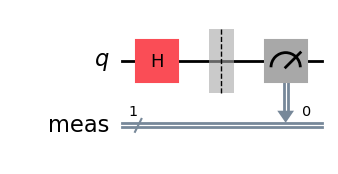

In [3]:
#Defining backend

backend_aer = AerSimulator()

# transpile the circuit, just in case you want to send to a real QC

qc_transpile = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qc_transpile.draw("mpl")

In [4]:
sampler_aer = SamplerV2(backend_aer)

job_aer = sampler_aer.run([(qc_transpile, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result()   

counts = result[0].data.meas.get_counts()

In [5]:
counts

{'1': 486, '0': 514}

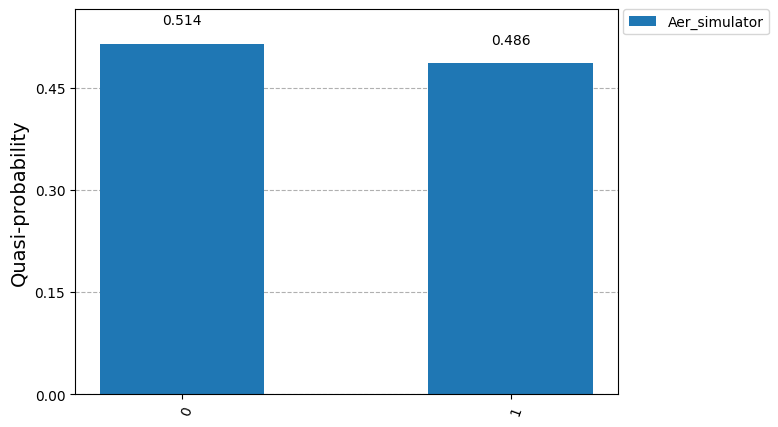

In [6]:
plot_distribution([counts], legend = ['Aer_simulator'])

In [7]:
#########The End#######